In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
from prophet import Prophet

In [7]:
def load_data():
    data = yf.download(tickers='GBPBRL=X', period='max', interval='1d')
    return data

In [8]:
# Load data into the data-frame
data = load_data()

[*********************100%%**********************]  1 of 1 completed


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5134 entries, 2004-08-26 to 2024-07-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5134 non-null   float64
 1   High       5134 non-null   float64
 2   Low        5134 non-null   float64
 3   Close      5134 non-null   float64
 4   Adj Close  5134 non-null   float64
 5   Volume     5134 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 280.8 KB


In [10]:
df = data[data.index.year >= (pd.to_datetime("now").year-10)]
df = df.reset_index()
df = df[['Date','Close']]

In [11]:
df.columns = ['ds', 'y']
df

,ds,y
0,2014-01-01,3.903600
1,2014-01-02,3.905000
2,2014-01-03,3.918200
3,2014-01-06,3.892900
4,2014-01-07,3.892700
...,...,...
2736,2024-07-01,7.067138
2737,2024-07-02,7.150082
2738,2024-07-03,7.194245
2739,2024-07-04,7.081002


In [12]:
df

,ds,y
0,2014-01-01,3.903600
1,2014-01-02,3.905000
2,2014-01-03,3.918200
3,2014-01-06,3.892900
4,2014-01-07,3.892700
...,...,...
2736,2024-07-01,7.067138
2737,2024-07-02,7.150082
2738,2024-07-03,7.194245
2739,2024-07-04,7.081002


In [19]:
m = Prophet(weekly_seasonality=False)
model = m.fit(df)

17:24:06 - cmdstanpy - INFO - Chain [1] start processing
17:24:07 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
future = m.make_future_dataframe(periods=90, freq='D')
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,3.865808,3.615341,4.098227,3.865808,3.865808,-0.009386,-0.009386,-0.009386,-0.009386,-0.009386,-0.009386,0.0,0.0,0.0,3.856422
1,2014-01-02,3.865088,3.606994,4.094533,3.865088,3.865088,-0.009922,-0.009922,-0.009922,-0.009922,-0.009922,-0.009922,0.0,0.0,0.0,3.855167
2,2014-01-03,3.864368,3.631056,4.083478,3.864368,3.864368,-0.010450,-0.010450,-0.010450,-0.010450,-0.010450,-0.010450,0.0,0.0,0.0,3.853918
3,2014-01-06,3.862209,3.612019,4.083888,3.862209,3.862209,-0.012149,-0.012149,-0.012149,-0.012149,-0.012149,-0.012149,0.0,0.0,0.0,3.850060
4,2014-01-07,3.861489,3.620286,4.103502,3.861489,3.861489,-0.012792,-0.012792,-0.012792,-0.012792,-0.012792,-0.012792,0.0,0.0,0.0,3.848697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826,2024-10-01,6.426816,6.158865,6.694353,6.329729,6.507416,0.002023,0.002023,0.002023,0.002023,0.002023,0.002023,0.0,0.0,0.0,6.428839
2827,2024-10-02,6.427195,6.154215,6.712110,6.327160,6.510533,-0.000076,-0.000076,-0.000076,-0.000076,-0.000076,-0.000076,0.0,0.0,0.0,6.427119
2828,2024-10-03,6.427574,6.130668,6.702851,6.325935,6.512662,-0.002223,-0.002223,-0.002223,-0.002223,-0.002223,-0.002223,0.0,0.0,0.0,6.425351
2829,2024-10-04,6.427953,6.125472,6.706596,6.324717,6.516478,-0.004378,-0.004378,-0.004378,-0.004378,-0.004378,-0.004378,0.0,0.0,0.0,6.423574


In [21]:
forecast.tail(90).head(20)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2741,2024-07-08,6.394607,6.125600,6.602541,6.394607,6.394607,-0.027544,-0.027544,-0.027544,-0.027544,-0.027544,-0.027544,0.0,0.0,0.0,6.367063
2742,2024-07-09,6.394986,6.131392,6.617799,6.394986,6.394986,-0.033351,-0.033351,-0.033351,-0.033351,-0.033351,-0.033351,0.0,0.0,0.0,6.361635
2743,2024-07-10,6.395365,6.104369,6.581624,6.395365,6.395365,-0.039490,-0.039490,-0.039490,-0.039490,-0.039490,-0.039490,0.0,0.0,0.0,6.355875
2744,2024-07-11,6.395744,6.110001,6.587898,6.395744,6.395744,-0.045880,-0.045880,-0.045880,-0.045880,-0.045880,-0.045880,0.0,0.0,0.0,6.349864
2745,2024-07-12,6.396123,6.096766,6.582683,6.396123,6.396123,-0.052435,-0.052435,-0.052435,-0.052435,-0.052435,-0.052435,0.0,0.0,0.0,6.343687
2746,2024-07-13,6.396501,6.095641,6.567369,6.396501,6.396501,-0.059062,-0.059062,-0.059062,-0.059062,-0.059062,-0.059062,0.0,0.0,0.0,6.337439
2747,2024-07-14,6.396880,6.098383,6.559647,6.396880,6.396880,-0.065664,-0.065664,-0.065664,-0.065664,-0.065664,-0.065664,0.0,0.0,0.0,6.331217
2748,2024-07-15,6.397259,6.106733,6.558988,6.397259,6.397259,-0.072140,-0.072140,-0.072140,-0.072140,-0.072140,-0.072140,0.0,0.0,0.0,6.325119
2749,2024-07-16,6.397638,6.081946,6.572835,6.397638,6.397638,-0.078391,-0.078391,-0.078391,-0.078391,-0.078391,-0.078391,0.0,0.0,0.0,6.319247
2750,2024-07-17,6.398017,6.062002,6.542925,6.398017,6.398017,-0.084320,-0.084320,-0.084320,-0.084320,-0.084320,-0.084320,0.0,0.0,0.0,6.313697


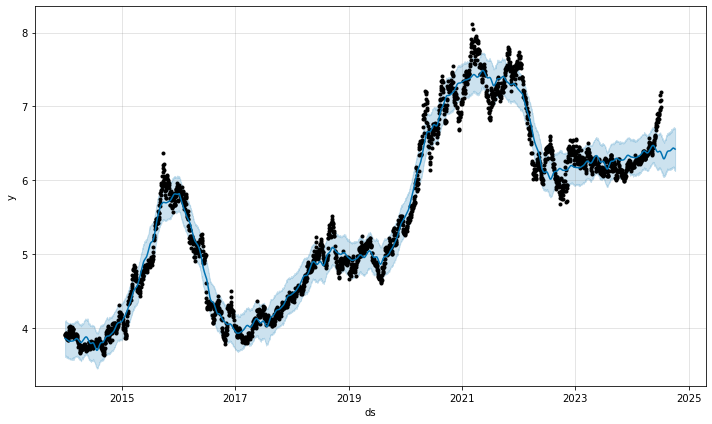

In [22]:
plot1 = m.plot(forecast)

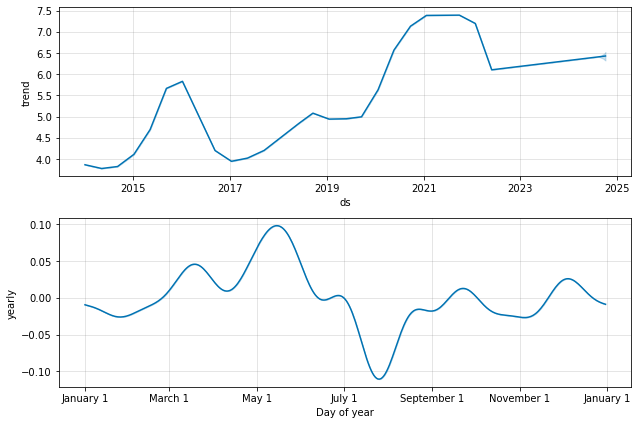

In [23]:
plot2 = m.plot_components(forecast)